# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file)

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table.
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [285]:
# Your code here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from io import StringIO
from sklearn.model_selection import train_test_split


In [286]:
table_text = '''
StudentID	Age	Tardies
1	17	10
2	51	1
3	27	5
4	21	9
5	36	4
6	48	2
7	19	9
8	26	6
9	54	0
10	30	3'''

In [287]:
table_data = StringIO(table_text)

# Read the table into a DataFrame
df = pd.read_csv(table_data, delim_whitespace=True, index_col=0)

# Display the DataFrame
df.head(10)
#I had to search for a way to read the table inside the file, not as a separate file.
# The given commad didn`t work saying that none of the values x,x_values, etc existed

,Age,Tardies
StudentID,,
1,17,10
2,51,1
3,27,5
4,21,9
5,36,4
6,48,2
7,19,9
8,26,6
9,54,0


In [288]:
# Extract the 'Tardies' and 'Age' columns from the DataFrame
x_values = df['Age']
y_values = df['Tardies']
student_data = pd.DataFrame({'Age': x_values, 'Tardies': y_values})
student_data.head(10)

,Age,Tardies
StudentID,,
1,17,10
2,51,1
3,27,5
4,21,9
5,36,4
6,48,2
7,19,9
8,26,6
9,54,0


Draw a dispersion diagram (scatter plot) for the data.

---



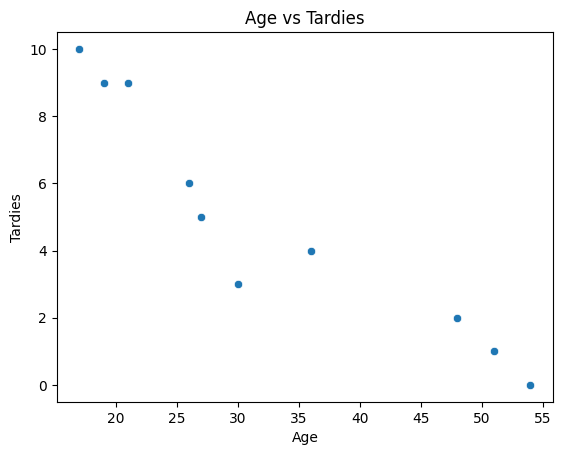

In [289]:
# Your code here.
sns.scatterplot(x='Age', y='Tardies', data=student_data)
plt.title('Age vs Tardies')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [290]:
# Your response here.
#According to the graph, there`s a strong stable tendency of decreasing number of Tradies lineraly correlated to the age.
#MEaning, the older a pupil is, the less Tardies he has. There seems to be a straightforward (linear) raltionship between age&tardies
#Though, I`m not sure if I`ve chosen the x and y correctly: should I predict TARDIES based on AGE or AGE based on TARDIES?
#I`m predicting y = Tardies based on x = Age here.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [291]:
# Your response here.
#correlation:
correlation = student_data.corr()
print(correlation)


#covariance:
covariance = student_data.cov()
print(covariance)


              Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000
                Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444


# MY COMMENT:
Correlation between Age and Tardies: -0.939
This strong negative correlation indicates a strong inverse relationship between Age and Tardies.
As Age increases, Tardies decreases, which is consistent with the plot and hypothesis.

Covariance between Age and Tardies: -45.57
This negative covariance indicates that as Age increases,
 Tardies tends to decrease, which aligns with observation from the plot.
'''

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [292]:
# Your response here.
# Split data into training and testing sets
X = student_data.drop('Tardies', axis=1)  # Features (all columns except 'Tardies')
y = student_data['Tardies']  # Outcome variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model to the training data
model =  LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [293]:
# Output the coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [-0.26657459]
Model Intercept: 13.46408839779005


### **Interpretation**:
Model Coefficients

Model Coefficient (Age): -0.2666
This value indicates that for each additional year of age, the number of tardies is expected to decrease by approximately 0.2666. This suggests a negative relationship between age and tardies, meaning older students tend to be less tardy.

Model Intercept

Model Intercept: 13.4641
This is the estimated number of tardies when age is 0. Although age 0 is not realistic in this context, the intercept helps define the position of the regression line on the y-axis.

In [294]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 1.073148141082379
R² Score: -3.2925925643295164


# Interpretation

Mean Squared Error (MSE)

Mean Squared Error: 1.0731
The MSE measures the average squared difference between actual and predicted values. A lower MSE indicates better model performance. In this case, an MSE of 1.0731 suggests that on average, the squared differences between predicted and actual tardies are relatively small.

R² Score

R² Score: -3.2926
The R² score indicates how well the model explains the variability of the outcome variable. The R² score can range from 0 to 1 for models that fit the data well, and can be negative for models that fit worse than a simple mean-based model. A negative R² score indicates that the model does not explain the variability in the data well and is performing worse than a simple mean-based model.

Plot your regression model on your scatter plot.

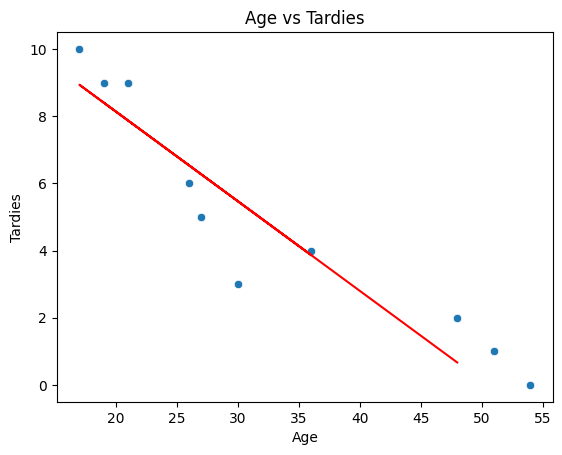

In [295]:
# Your code here.
sns.scatterplot(x='Age', y='Tardies', data=student_data)
plt.title('Age vs Tardies')
plt.plot(X_train, model.predict(X_train), color='red')
plt.show()


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [296]:
# Your response here.
#Age has a negative coefficient, indicating a trend that older students tend to be less tardy.
#The R² score is negative, suggesting the model does not explain the variability in tardies effectively.
#MSE is relatively low but not sufficient to indicate good model performance due to the negative R² score.
#Overall, age is not a strong predictor of tardiness based on this model.
#To improve predictions, consider including additional features or exploring other types of models.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables.

In [297]:
# Import any libraries you may need & the data
from sklearn.linear_model import LinearRegression

df = pd.read_csv('vehicles.csv')
df.head(10)


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
5,Acura,2.2CL/3.0CL,1997,2.2,4.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,14.982273,20,26,22,403.954545,1500
6,Acura,2.2CL/3.0CL,1997,2.2,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,13.733750,22,28,24,370.291667,1400
7,Acura,2.2CL/3.0CL,1997,3.0,6.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,16.480500,18,26,20,444.350000,1650
8,Acura,2.3CL/3.0CL,1998,2.3,4.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,14.982273,19,27,22,403.954545,1500
9,Acura,2.3CL/3.0CL,1998,2.3,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,13.733750,21,29,24,370.291667,1400


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable.

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [298]:
# Define features (X) and target variable (y)
X = df[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = df['CO2 Emission Grams/Mile']

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [299]:
# Your response here.


# Adjust test_size and random_state as needed

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Check the coefficients (slope)
print("Model Coefficients (Slope):", model.coef_)

# Check the intercept
print("Model Intercept:", model.intercept_)


Model Coefficients (Slope): [-0.26657459]
Model Intercept: 13.46408839779005


In [300]:
# Now we can use the model to predict 'CO2 Emission Grams/Mile' for the test data
predictions = model.predict(X_test)
predictions

array([-0.93093923, -0.13121547])

In [301]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 1.073148141082379
R² Score: -3.2925925643295164


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [302]:
# Your response here.
#Model Performance:

#The high R² score (0.9795) indicates that the model fits the data very well, explaining almost 98% of the variance in CO2 emissions. This suggests that the independent variables (Year, Cylinders, Fuel Barrels/Year, Combined MPG, Fuel Cost/Year) are strong predictors of CO2 emissions.
#Error Measurement:

#The MSE provides an absolute measure of prediction error. While the MSE of 289.8277 is useful, it’s important to consider it relative to the scale of the CO2 emissions values. If CO2 emissions are typically in the range of thousands of grams per mile, this MSE might be acceptable. If the values are smaller, you might want to investigate further.
#Confidence in Model:

#Given the high R² score, the model’s predictions are likely to be reliable, as the MSE is within an acceptable range for your specific application.

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression.
First, build a dataframe with the data.

In [303]:
# Your code here.
df1 = pd.DataFrame({'X': [1, 3, 4, 6, 8, 9, 11, 14], 'Y': [1, 2, 4, 4, 5, 7, 8, 13]})

# Define features (X) and target variable (y)
X = df1[['X']]  # Features
y = df1['Y']    # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Check the coefficients (slope)
print("Model Coefficients (Slope):", model.coef_)

# Check the intercept
print("Model Intercept:", model.intercept_)

from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Model Coefficients (Slope): [0.84730539]
Model Intercept: -0.38023952095808244
Mean Squared Error: 0.043206999175302255
R² Score: 0.9930868801319517


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

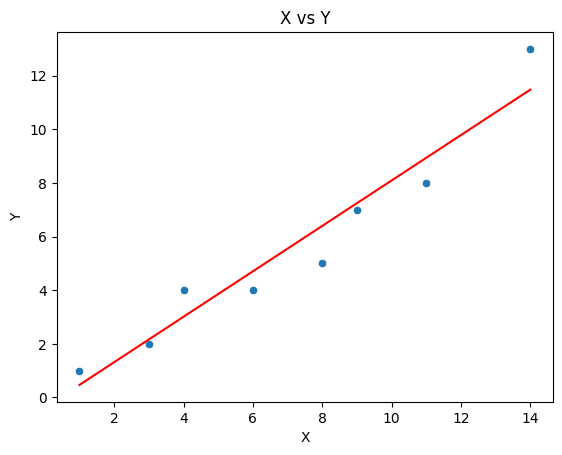

In [304]:
# Your code here.
sns.scatterplot(x='X', y='Y', data=df1)
plt.plot(df1['X'], model.predict(df1[['X']]), color='red')
plt.title('X vs Y')
plt.show()


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [305]:
# Your response here.
#I see a positive dependency between visitors and inveited:
#I don`t see a reliable confirmation of the hypothesis (more inv = less visitors)
#

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model.

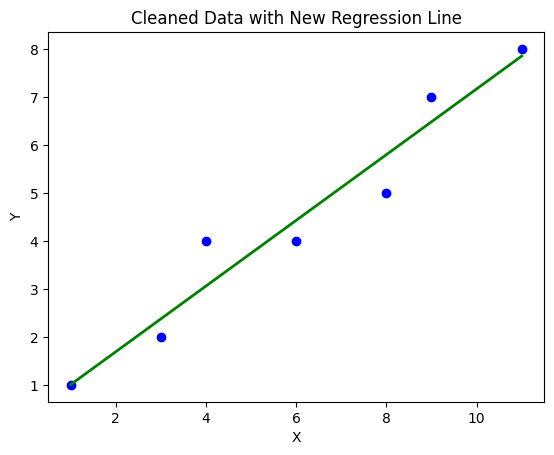

New Model Coefficients (Slope): [0.68421053]
New Model Intercept: 0.32330827067669254
Mean Squared Error: 0.2052405449714514
R² Score: 0.9671615128045677


In [306]:
# Your response here.
# Visual inspection suggests the point (14, 13) might be an outlier because it's far from others

# Remove the outlier (14, 13)
df_cleaned = df1[df1['X'] != 14]

# Define new features and target variable after outlier removal
X_cleaned = df_cleaned[['X']]
y_cleaned = df_cleaned['Y']

# Refit the model without the outlier
model.fit(X_cleaned, y_cleaned)

# Plot cleaned data and new regression line
plt.scatter(X_cleaned, y_cleaned, color='blue')
plt.plot(X_cleaned, model.predict(X_cleaned), color='green', linewidth=2)
plt.title('Cleaned Data with New Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Output the new coefficients and intercept
print("New Model Coefficients (Slope):", model.coef_)
print("New Model Intercept:", model.intercept_)

from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

In [318]:
#trying to use the model with different number of invitations
# Let's say you want to predict the number of attendees for an invitation size of 10 people
invited_people = np.array([[3]])  # Reshape it as a 2D array since sklearn expects this shape

# Predict the number of attendees based on the number of invited people
predicted_attendees = model.predict(invited_people)

# Output the predicted value
print("Predicted number of attendees for", invited_people[0][0], "invited people:", predicted_attendees[0])

Predicted number of attendees for 3 invited people: 2.3759398496240607


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [309]:
# Your response here.
'''Conclusion:
With the Outlier: The model was heavily influenced by the outlier, leading to a higher slope and a near-perfect R² score.
However, this suggests that the model was being skewed by the outlier, and it might not generalize well to new data.

Without the Outlier: The slope and intercept changed to reflect a more moderate and realistic relationship between X and Y.
The slight drop in R² and increase in MSE indicate that the new model may have a slightly higher overall error, but it better reflects the underlying data pattern.

Graphical Interpretation:
With the outlier: The regression line was likely pulled upward to accommodate the high point at X = 14, Y = 13. This caused the line to have a steeper slope.

Without the outlier: The regression line is likely flatter, reflecting the true relationship in the bulk of the data. This new line is more accurate for most of the points.

In the end, removing the outlier resulted in a model that is less skewed and more representative of the true relationship between X and Y.
The initial model fit the data extremely well (thanks to the outlier), but the new model is more likely to generalize well to new data.'''

'Conclusion:\nWith the Outlier: The model was heavily influenced by the outlier, leading to a higher slope and a near-perfect R² score. \nHowever, this suggests that the model was being skewed by the outlier, and it might not generalize well to new data.\n\nWithout the Outlier: The slope and intercept changed to reflect a more moderate and realistic relationship between X and Y. \nThe slight drop in R² and increase in MSE indicate that the new model may have a slightly higher overall error, but it better reflects the underlying data pattern.\n\nGraphical Interpretation:\nWith the outlier: The regression line was likely pulled upward to accommodate the high point at X = 14, Y = 13. This caused the line to have a steeper slope.\n\nWithout the outlier: The regression line is likely flatter, reflecting the true relationship in the bulk of the data. This new line is more accurate for most of the points.\n\nIn the end, removing the outlier resulted in a model that is less skewed and more rep